<B>Who: </B> 
<br>City and Local Governments</br>

<br><B>Description:</B> </br>
<br>To encourage bike usage, cities across world have rolled out Bike Sharing program that hosts data ranging from travel time, start & end location, weather, traffic, demographics of riders and so on. The Capital Bike Sharing dataset contains information relaed to one such bike sharing program and is useful for different reasearch areas.</br>

<br><B>Question asked: </B></br> 
<br>Can we predict bike rental demand for bike sharing program</br>

<br><B>Type of ML problem: </B> </br>
<br>Classification or regression. It is likely regression problem for we are assessing volume or count of bike rented for a given duration and count may be a continuous range of numbers. </br>

<br><B>Input: </B> </br>
<br>instant	dteday	season	yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt</br>

<br><B>Features: </B></br>
<br>season, hr, travel time, start & end location, weather, traffic, casual, registered</br>

<br><B>Output: </B></br> 
<br>Count of total rental bikes including both casual and registered</br>

<br><B>Data collection: </B> </br>
<br>Data is donated to the UCI ML Repository https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset</br>

<br><B>How predictions are used: </B></br> 
<br>We apply the model to make predictions to identify which data features influence bike renting during a day.</br>

<br><B>A Dive into the data set:</B></br> 

<br>In terms of cleaning and wrangling, I need to see the distribution of each column and identify how many rows have missing data. This is called Exploratory Data Analysis step.

<h1> Exploratory Data Analysis

In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
stats = pd.read_csv('hour.csv')

In [4]:
#Shape of dataset
stats.shape

(17379, 17)

<h2> The dataset contains more than 17K records with 17 features

In [33]:
# top 3 rows from the dataset
stats.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [34]:
#finding if any nulls and data types of the features
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<h3> Renaming the columns, Type casting the attributes 

In [5]:
stats.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

In [6]:
#type casting the attributes
stats['datetime'] = pd.to_datetime(stats.datetime)#dae time conversion
# categorical variables
stats['season'] = stats.season.astype('category')
stats['is_holiday'] = stats.is_holiday.astype('category')
stats['weekday'] = stats.weekday.astype('category')
stats['weather_condition'] = stats.weather_condition.astype('category')
stats['is_workingday'] = stats.is_workingday.astype('category')
stats['month'] = stats.month.astype('category')
stats['year'] = stats.year.astype('category')
stats['hour'] = stats.hour.astype('category')

<h1> Visualizing Distribution & Trends

[Text(0.5,1,u'Season Wise Hourly Distribution of Bike Rental Counts')]

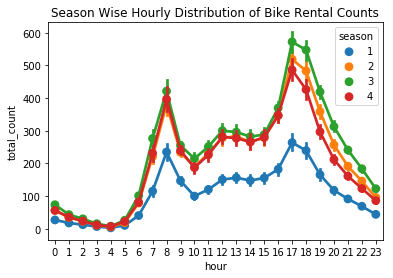

In [37]:
fig, ax = plt.subplots()
sns.pointplot(data = stats[['hour', 'total_count', 'season']], x= 'hour', y = 'total_count', hue = 'season', ax= ax)
ax.set(title = "Season Wise Hourly Distribution of Bike Rental Counts")

<B> Above graph shows similar trends for all seasons with counts peaking in the morning between 
7 -9 AM and in the evening between 4-6 PM for the reason those are business hours. The counts are 
lowest for spring season while highest foor Fall across 24 hours </B>

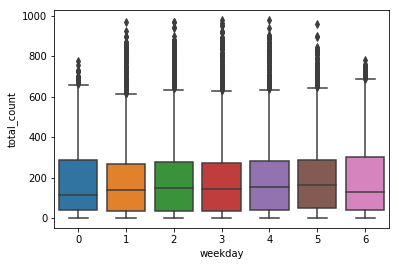

In [38]:
vis2 = sns.boxplot(data=stats, x='weekday', y='total_count')

<B> Rental Duration Variation Across a Quarter

[Text(0.5,1,u'Month Wise Hourly Distribution of Bike Rental Counts')]

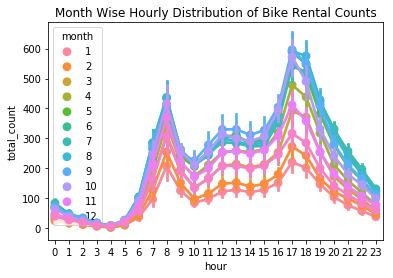

In [39]:
fig, ax = plt.subplots()
sns.pointplot(data = stats[['hour', 'total_count', 'month']], x= 'hour', y = 'total_count', hue = 'month', ax= ax)
ax.set(title = "Month Wise Hourly Distribution of Bike Rental Counts")

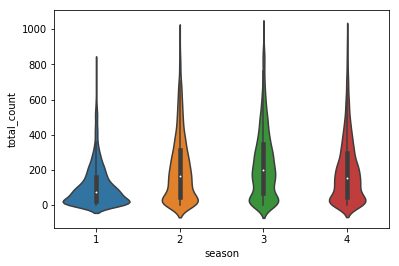

In [40]:
z = sns.violinplot(data=stats, x='season', y= 'total_count')

<B> By above plot, spring season is when higher probability 
that members of the population will take on the same as median value of
population count i.e. ~150. Rest all seasons show skinny distribution across

<B> Finding Outliers in the Dataset by User Type, Temperature and Windspeed using Box Plots

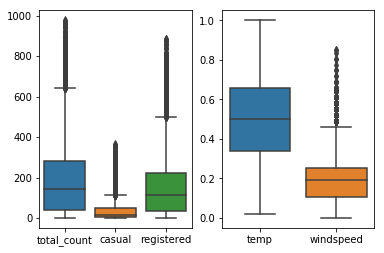

In [57]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
sns.boxplot(data = stats[['total_count', 'casual', 'registered']], ax = ax1)
sns.boxplot(data = stats[['temp', 'windspeed']], ax = ax2)

<B> The total, casual & registered type users show sizeable number of outlier values, 
however casual show lower numbers though. For weather attributes 
of temperature and wind speed, we see outliers only in the case of windspeed.

[Text(0,0.5,u'Count'),
 Text(0.5,0,u'Working Day'),
 Text(0.5,1,u'Box Plot On Count Across Working Day')]

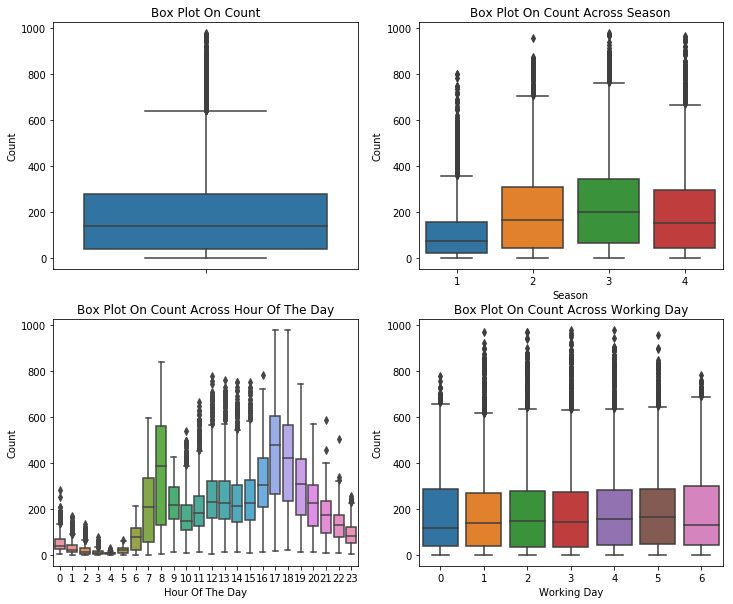

In [8]:
# OUTLIER Analysis
import seaborn as sn

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=stats,y="total_count",orient="v",ax=axes[0][0])
sn.boxplot(data=stats,y="total_count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=stats,y="total_count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=stats,y="total_count",x="weekday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

<B>Outliers Analysis</b>
At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.

<B> Lets Remove Outliers In The Count Column

In [20]:
dailyDataWithoutOutliers = stats[np.abs(stats["total_count"]-stats["total_count"].mean())<=(3*stats["total_count"].std())] 

print ("Shape Of The Before Ouliers: ",stats.shape)
print ("Shape Of The After Ouliers: ",dailyDataWithoutOutliers.shape)

('Shape Of The Before Ouliers: ', (17379, 17))
('Shape Of The After Ouliers: ', (17135, 17))


<h1>Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
"Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.
Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

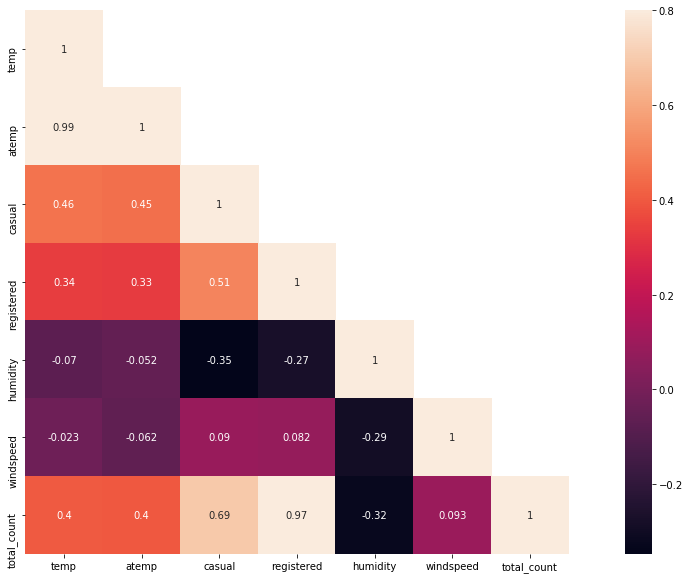

In [10]:
corrMatt = stats[["temp","atemp","casual","registered","humidity","windspeed","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

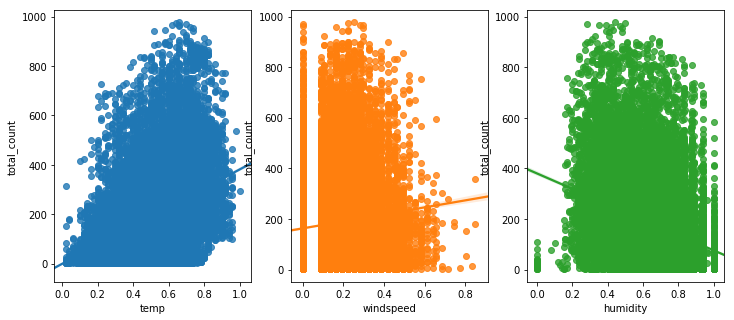

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="total_count", data=stats,ax=ax1)
sn.regplot(x="windspeed", y="total_count", data=stats, ax=ax2)
sn.regplot(x="humidity", y="total_count", data=stats,ax=ax3)